##ACTIVIDAD SEMANAL 7 -- REGRESIONES Y K MEANS
##NOTEBOOK 2 -  K MEANS 

###Denisse María Ramírez Colmenero 

###A01561497



Materia: Ciencia y Analítica de Datos 

Profesora titular: Doc. María de la Paz Rico Fernández

Profesor tutor: Orlando Figón Cruz 

Fecha de entrega: 09 de Noviembre de 2022 

-------------------------------------------------------------------------------------------------------------------

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

In [5]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 6.8 MB/s 
     |████████████████████████████████| 1.0 MB 44.6 MB/s 
     |████████████████████████████████| 1.7 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 49.9 MB/s 
     |████████████████████████████████| 6.3 MB 38.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e42952dc07185f8b3b7509e55db8a6822fe5a31466002aeab3bf9c4da2a14c11
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=3afba290b04b49e2f60b38502740d798e0bb8dc86fcd69c0836516349949f78a
  Stored in directory: /root/.

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importar la base de datos

In [7]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Explorar los datos

In [8]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


In [26]:
df.shape

(1839, 7)

**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [10]:
latlong=df[["latitude","longitude"]]
latlong

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

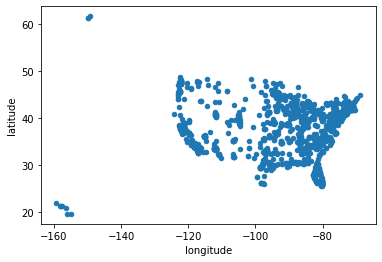

In [11]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [12]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [14]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [15]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [16]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [17]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

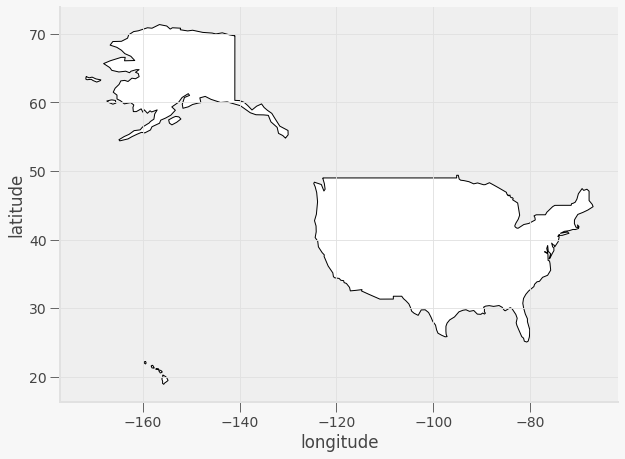

In [18]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

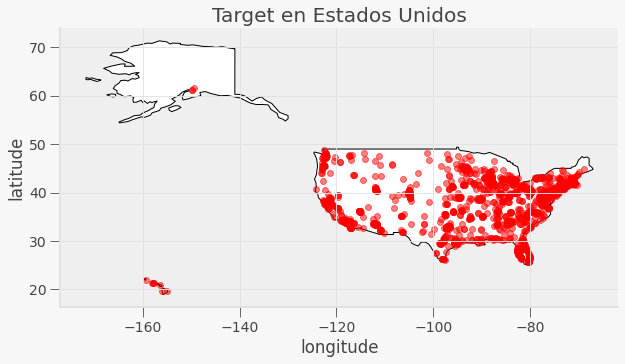

In [19]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

La agrupación de clusters es la agrupación de casos en un conjunto de datos en clústeres que tienen características similares. 

Un número de destino K indica el número de centroides en el conjunto de datos. Un centroide hace referencia a un punto representativo de cada clúster. 

Después, coloca cada datapoint en su cluster más cercano. 

###PARTE 1 

Encuentra el numero ideal de almacenes, justifica tu respuesta:

In [30]:
from sklearn.cluster import KMeans
#en este caso cada cluster representa una región donde se agrupan las tiendas de Target. 
#grupo de tiendas = Kmean 
k_clusters = range(1,5) #arbitrariamente decidimos que el número de clusters, es decir, almacenes, no sean mas de 5.  
k_means = [KMeans(n_clusters=i) for i in k_clusters] #evaluamos que numero de clusters es conveniente según la ubicación de las tiendas   
Y = latlong[['latitude']]
X = latlong[['longitude']]
score = [k_means[i].fit(Y).score(Y) for i in range(len(k_means))] 
#Cada centroide busca tener un cantidad alta de k vecinos, mientras menos vecinos tiene, su score es mas grande y negativo. Por lo que buscamos qe sea cercano a 0. 

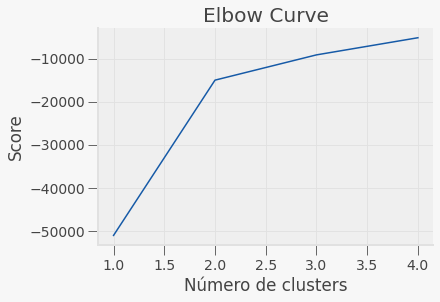

In [31]:
plt.plot(k_clusters, score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La gráfica "Elbow curve" nos ayuda a seleccionar el valor optimo de k, es decir, cuantos almacenes sería lo más adecuado de acuerdo a la cantidad de tiendas y sus ubicaciones. 
Debemos seleccionar el número de clusters que este justo antes de que la gráfica empiece a descender, es decir 3. 
No seleccionamos más K means ya que estaríamos cayendo en el overfitting y en realidad no mejora mucho el modelo ya que también estamos buscando que la distancia entre los K means sea mayor.

1. ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

La gráfica "Elbow curve" nos ayuda a seleccionar el valor optimo de k, es decir, cuantos almacenes sería lo más adecuado de acuerdo a la cantidad de tiendas y sus ubicaciones. Debemos seleccionar el número de clusters que este justo antes de que la gráfica empiece a descender, es decir 3. No seleccionamos más K means ya que estaríamos cayendo en el overfitting y en realidad no mejora mucho el modelo ya que también estamos buscando que la distancia entre los K means sea mayor. Por otro lado, tampoco seleccionar valores donde la gráfica descienda descontroladamente ya que esto significa que la suma de las distancias de las tiendas (k-vecinos) a su centroide es mayor y lo que buscamos es que tengan la menor distancia posible. 

###PARTE 2 

2. Encuentra las latitudes y longitudes de los almacenes

In [32]:
k_means = KMeans(n_clusters = 3) #creamos los 3 clusters 
k_means.fit(latlong[latlong.columns[0:2]])#entrenamos el modelo con la latitud y longitud 
labels = k_means.labels_
labels #esto nos ayudará a saber cuantas tiendas pertenecen a cada cluster.

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

In [46]:
Xx = df[["longitude","latitude"]]

k_means = KMeans(n_clusters=3).fit(Xx)
labels = k_means.predict(Xx) 

centroides = k_means.cluster_centers_#obtenemos los centroides de cada cluster, es decir la latitud y longitud de cada almacen 
centroides #estas son las coordenadas de los nuevos almacenes para Target, con esto podemos obtener la ciudad. 

array([[ -78.56990807,   37.789554  ],
       [-118.62447332,   37.48734203],
       [ -93.3271723 ,   37.98006261]])

In [49]:
#Agrupamos las coordenadas en una sola columna para poder graficarlo en un mapa mundial 
coord = pd.DataFrame(centroides)
coord["Coordenadas"] = list(zip(coord[0], coord[1]))#transformar a lista
coord["Coordenadas"] = coord["Coordenadas"].apply(Point) #unimos la longitud y latitud en uno solo, como lo hicimos al inicio

geopanda_df= gpd.GeoDataFrame(coord, geometry="Coordenadas") #convertimos el dataframe en un geodataframe para poder graficarlo en un mapa
geopanda_df

,0,1,Coordenadas
0,-78.569908,37.789554,POINT (-78.56991 37.78955)
1,-118.624473,37.487342,POINT (-118.62447 37.48734)
2,-93.327172,37.980063,POINT (-93.32717 37.98006)


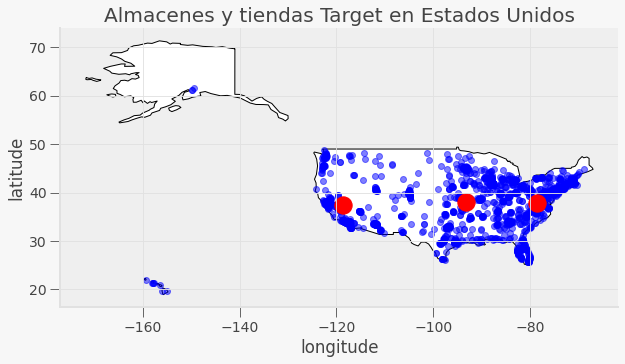

In [50]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5) #Aqui grafica los datos originales
geopanda_df.plot(ax=gax, color='red', alpha = 1, markersize = 300) #Aqui grafica los datos de nuestro dataset 

#De aqui para abajo es puro ploting busines
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Almacenes y tiendas Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Los puntos azules son todas las tiendas de Target en Estados Unidos, mientras que los puntos rojos indican la ubicación adecuada para los nuevos 3 almacenes. 

In [51]:
#usamos la funcion .labels_ para saber cuantas tiendas pertenecen a cada cluster. 
latlong['kmeans'] = k_means.labels_ 
latlong.loc[:, 'kmeans'].value_counts() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    826
2    628
1    385
Name: kmeans, dtype: int64

In [56]:
Almacen_1 = str(geopanda_df[1][0]) + ", " + str(geopanda_df[0][0])
print('Coordenadas de almacén 1:',Almacen_1)
Almacen_2 = str(geopanda_df[1][1]) + ", " + str(geopanda_df[0][1])
print('Coordenadas de almacén 2:',Almacen_2)
Almacen_3 = str(geopanda_df[1][2]) + ", " + str(geopanda_df[0][2])
print('Coordenadas de almacén 3:',Almacen_3)

Coordenadas de almacén 1: 37.789554004474006, -78.56990807484885
Coordenadas de almacén 2: 37.48734203064935, -118.62447331844157
Coordenadas de almacén 3: 37.98006260590112, -93.32717230430622


In [59]:
from geopy.geocoders.yandex import Location #esta liberia nos ayuda a localizar paises, ciudades, direcciones, etc mediante las coordenadas. 
from geopy.geocoders import Nominatim #
from geopy.distance import geodesic #calcular la distancia real entre dos puntos 

geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria.
#El user_agent permite al Open Street Map rastrear fácilmente quién está utilizando su servicio.
#Si no se agrega ese parámetro, pueden bloquear tu dirección IP para que no puedas acceder al servicio, ya que eso sería una violación de sus condiciones de servicio.

Almacenes = [Almacen_1,Almacen_2,Almacen_3]

print("Ciudades seleccionadas para construir los almacenes de Target")
for i in Almacenes:
  ubi = geolocator.reverse(i) #Reverse ya que el input es las coordenadas y el output el nombre de la ciudad
  print(ubi.address)


Ciudades seleccionadas para construir los almacenes de Target
Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
Paradise Estates, Mono County, California, United States
Hickory County, Missouri, United States


1. ¿Qué ciudad es?, ¿a cuantas tiendas va surtir?

Según los resultados obtenidos, los almacenes se podrían ubicar en: 

Almacén 1: Langhorne Road, Totier Hills, Albemarle County, Virginia y sería proveedor de 826 tiendas. 

Almacén 2: Paradise Estates, Mono County, California y sería proveedor de 385 tiendas. 

Almacén 3: Hickory County, Missouri y sería proveedor de 628 tiendas. 

Estos resultados suenan lógicos ya que si observamos el mapa que graficamos anteriormente, vemos que junto al almacén 1 (index 0) que es en Virginia, se encuentran más tiendas, mientras que junto al almacén 2 (index 1) en California, hay menos tiendas.   

2. ¿Sabes a que distancia estará?

In [65]:
distancia23 = str(geodesic(Almacen_2, Almacen_3).kilometers)
print("Distancia entre el Almacen 2 (California) y el Almacen 3 (Missouri):", distancia23, 'kilometros')

distancia31 = str(geodesic(Almacen_3, Almacen_1).kilometers)
print("Distancia entre el Almacen 3 (Missouri) y el Almacen 1 (Virginia):", distancia31, 'kilometros')

distancia21 = str(geodesic(Almacen_2, Almacen_1).kilometers)
print("Distancia entre el Almacen 2 (California) y el Almacen 1 (Virginia):", distancia21, 'kilometros')

Distancia entre el Almacen 2 (California) y el Almacen 3 (Missouri): 2223.726700333532 kilometros
Distancia entre el Almacen 3 (Missouri) y el Almacen 1 (Virginia): 1297.004040608758 kilometros
Distancia entre el Almacen 2 (California) y el Almacen 1 (Virginia): 3507.813810910429 kilometros


###PARTE 3 

1. ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

Investigando un poco pude encontrar otras librerías para Python para la manipulación y análisis de datos que tienen que ver con una referencia espacial, información geográfica, geocodificación de direcciones, etc. Algunas de las más principales son: ArcPy, Cartopy, Folium y las que ya pudimos hacer uso de ellas en esta actividad como Geopandas, Geopy, Matplotlib y Numpy. Todas sirven para el procesamiento de datos geoespaciales incluso la interfaz de algunas estan construidas sobre otras como en el caso de Cartopy que esta su interfaz está construida sobre Matplotlib y hace uso de las bibliotecas de Numpy, pero cada una cuenta con sus propias herramientas distintas. 
En lo personal opino que estas librerías y por supuesto que otras más pueden permitirnos analizar los datos y manipularlos de maneras muy interesantes por lo que espero en un futuro poder hacer uso de ellas, como lo hicimos en este ejercicio con Geopy y Geopandas. 


2. ¿Consideras importante que se grafique en un mapa?, ¿por qué?

Si por supuesto. Si bien hemos visto en las actividades anteriores, los distintos tipos de gráfica nos han ayudado a visualizar nuestros datos y sus resultados, sin embargo hay conjuntos de datos que aunque sus datos también pueden visualizarse de esa manera, visualizarlos geográficamente/espacialmente ayudan mejor a la comprensión y la interpretación de estos. Esta actividad es uno de esos ya que por ejemplo al querer visualizar donde se encuentran ubicadas las tiendas de Target es más fácil y también más divertido observar esos datos en un mapa de Estados Unidos que una tabla o una gráfica de barras normal.
Otros ejemplos pueden ser cuando queremos conocer rutas de transporte de una empresa, cuando queremos analizar el cultivo de un fruto por región, cuando queremos conocer donde hay más ventas de un producto, o hasta cosas más complicadas como información relacionada a catastrofes naturales, relieves terrestres, etc. 

Recordemos que el objetivo de visualizar los datos es precisamente ayudarnos a comprender lo que los datos nos quieren decir y personalmente esta actividad la voy a recordar con mayor claridad que las demás ya que al entiender realmente un gráfico, el análisis de esos datos se vuelve menos complicado.  



Agrega las conclusiones

Respecto a K-means considero que ha sido una de las más fáciles de trabajar y comprender. Es una manera sencilla de clasificar los datos según sus patrones y características además que es una técnica que puede ser usada en muchas aplicaciones. Disfrute de esta actividad ya que además de usar nuevas librerías también pude entender mejor estas técnicas ya que me pareció que el caso de Target fue aplicación real y un ejemplo de lo mucho que podemos hacer con estos modelos y técnicas en el mundo real. 

REFERENCIAS: 

1. Agrupación en clústeres K-means: referencia del componente - Azure Machine Learning. (2022, 27 octubre). Microsoft Learn. https://learn.microsoft.com/es-es/azure/machine-learning/component-reference/k-means-clustering

2. Creating a GeoDataFrame from a DataFrame with coordinates — GeoPandas 0.12.1+0.g195f70b.dirty documentation. (s. f.). https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

3. Understanding K-means Clustering in Machine Learning by Education Ecosystem (LEDU). (2018, 12 septiembre). Towards Data Science. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

4. Welcome to GeoPy’s documentation! — GeoPy 2.2.0 documentation. (s. f.). https://geopy.readthedocs.io/en/stable/index.html

5. Creating a GeoDataFrame from a DataFrame with coordinates — GeoPandas 0.12.1+0.g195f70b.dirty documentation. (s. f.-b). https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

6. Morales, A. (2022b, octubre 4). 15 librerías de Python para GIS. MappingGIS. https://mappinggis.com/2022/04/15-librerias-de-python-para-gis/